### OBJECTIVE

Upon intial inspection of the data, we can start thinking of some question about it that we would want to answer

-What is the overall sales trend?


-what are the top 10 products by sales?

-what are most selling products ship mode?

-which is the most prefered ship mode?

-which are the most profitable category and sub-category?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel("superstore_sales.xlsx")

In [3]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
# Shape of Dataset
data.shape

(51290, 21)

In [5]:
# Columns of Dataset
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
# a consine summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

Checking missing values

In [7]:
data.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

Getting descriptive statistics summary

In [8]:
data.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


### Data Analysis

WHAT IS THE OVERALL SALES TREND ?

In [9]:
data['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [10]:
data['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [11]:
# Getting year and Month from DataSet

In [12]:
data["month_year"] = data["order_date"].apply(lambda x: x.strftime('%y-%m'))

In [13]:
data["month_year"]

0        11-01
1        11-01
2        11-01
3        11-01
4        11-01
         ...  
51285    14-12
51286    14-12
51287    14-12
51288    14-12
51289    14-12
Name: month_year, Length: 51290, dtype: object

In [14]:
# Grouping month year

In [15]:
data_trend = data.groupby('month_year').sum() ['sales'].reset_index()

In [16]:
# setting the figure size

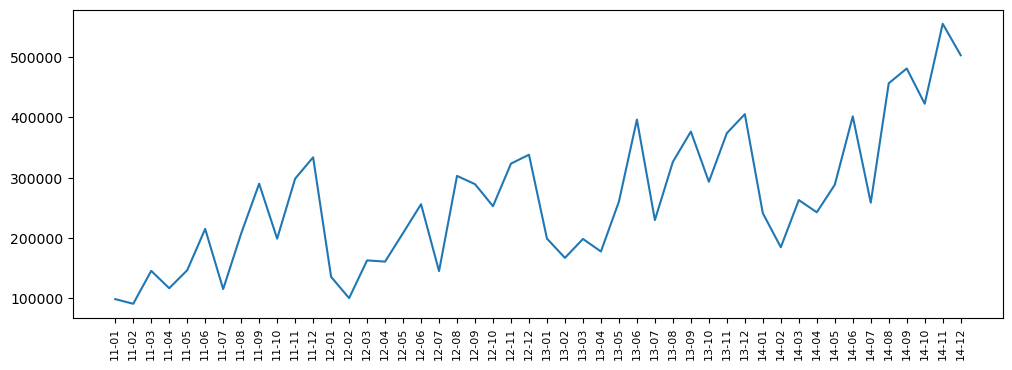

In [17]:
plt.figure(figsize=(12,4))
plt.plot(data_trend['month_year'], data_trend['sales'])
plt.xticks(rotation='vertical', size=8)
plt.show()

2 :- WHICH ARE THE TOP 10 PRODUCTS BY SALES ?

In [18]:
# Grouping product name columns

In [27]:
prod_sales = pd.DataFrame(data.groupby('product_name').sum()['sales'])

In [30]:
# sorting

In [37]:
prod_sales = prod_sales.sort_values('sales',ascending=False)

In [35]:
# TOP 10 BY PRODUCTS SALES

In [36]:
prod_sales[:10]

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",146.688
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",176.288
#6 3/4 Gummed Flap White Envelopes,71.280
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",2706.080


 WHICH ARE THE MOST SELLING PRODUCT ?

In [38]:
# GROUPING PRODUCT NAME

In [39]:
most_sell_prod = pd.DataFrame(data.groupby('product_name').sum()['quantity'])

In [40]:
# SORTING

In [42]:
most_sell_prod = most_sell_prod.sort_values('quantity',ascending=False)

In [43]:
most_sell_prod[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


 WHICH IS THE MOST PREFFERED MODE ?

In [44]:
# SETTING FIGURE SIZE

C:\Users\hites\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

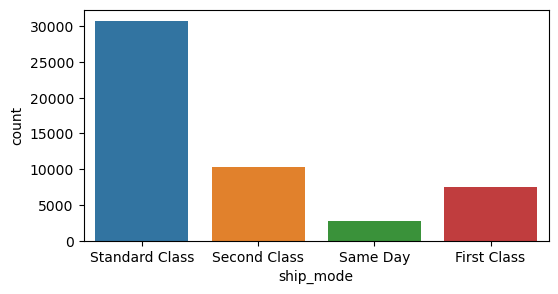

In [49]:
plt.figure(figsize=(6,3))

# PLOTTIN SHIPMODE
sns.countplot(data['ship_mode'])
plt.show

 WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY ?

In [52]:
cat_subcat_profit = pd.DataFrame(data.groupby(['category','sub_category']).sum()['profit'])

In [54]:
cat_subcat_profit.sort_values(['category','profit'],ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

In [ ]:
writer = pd.ExcelWriter("Row_data_sales_analytics.xlsx", engine='xlsxwriter')
data.to_excel(writer, sheet_name="Data" , index=False)
data1.to_excel(writer, sheet_name="Month Qty Sold", index=False)
data2.to_excel(writer ,sheet_name="Category Qty Sold" , index=False)
data3.to_excel(writer , sheet_name="sub-channel sales", index=False)
data4.to_excel(writer , sheet_name="Month Higest sales", index=False)
data5.to_excel(writer , sheet_name="Higest selling product", index=False)
List_of_platfrom.to_excel(writer , sheet_name="sub-channel And Product", index=False)
writer.save()
data

In [56]:
writer = pd.ExcelWriter("superSalesAnalysis.xlsx", engine='xlsxwriter')
data.to_excel(writer , sheet_name="Data" , index=False)
data_trend.to_excel(writer , sheet_name="Trend" , index=False)
prod_sales.to_excel(writer , sheet_name="prod_sales" , index=False)
most_sell_prod.to_excel(writer , sheet_name="most_sell_prod" , index=False)
cat_subcat_profit.to_excel(writer , sheet_name="cat_subcat" , index=False)
writer.save()
data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,11-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,11-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,11-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,11-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,14-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,14-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,14-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,14-12
